In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()
data

{'items': [],
 'found': 0,
 'pages': 1,
 'page': 0,
 'per_page': 10,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=1&enable_snippets=true&items_on_page=10&order_by=publication_time&text=%D0%A4%D0%B8%D0%B7%D0%B8%D0%BA-%D1%8F%D0%B4%D0%B5%D1%80%D1%89%D0%B8%D0%BA'}

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
specializations = [
    "Физик-ядерщик",
    "Шеф-повар",
    "Архитектор",
    "Психолог",
    "Журналист"
]

def get_vacancies(specialization):
    URL = 'https://api.hh.ru/vacancies'
    params = {
        'text': specialization,
        'area': 1,  # Москва
        'page': 0,
        'per_page': 10
    }
    response = requests.get(URL, params)
    return response.json()

vacancies_data = {spec: get_vacancies(spec) for spec in specializations}
vacancies_data
# Вывод количества найденных вакансий для каждой специальности
total_vacancies = 0
for spec, data in vacancies_data.items():
    print(f"Специальность: {spec}, Найдено вакансий: {data.get('found', 0)}")
    total_vacancies += data.get('found', 0)

Специальность: Физик-ядерщик, Найдено вакансий: 0
Специальность: Шеф-повар, Найдено вакансий: 938
Специальность: Архитектор, Найдено вакансий: 2902
Специальность: Психолог, Найдено вакансий: 5907
Специальность: Журналист, Найдено вакансий: 358


Посчитайте сколько всего найдено вакансий:

In [ ]:
total_vacancies

10105

Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
# Структура данных для хранения информации о компаниях и их координатах
companies = []

# Извлечение данных о компаниях и их координатах
for spec, data in vacancies_data.items():
    for vacancy in data.get('items', []):
        company_name = vacancy.get('employer', {}).get('name')

        # Проверяем, что адрес существует и содержит координаты
        address = vacancy.get('address')
        if address:
            latitude = address.get('lat')
            longitude = address.get('lng')
        else:
            latitude = None
            longitude = None

        if company_name:
            companies.append({
                "name": company_name,
                "latitude": latitude,
                "longitude": longitude
            })


Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
# Вывод структуры данных
for company in companies:
    print(company)


{'name': 'Иванова Юлия', 'latitude': None, 'longitude': None}
{'name': 'BORK', 'latitude': 55.749299, 'longitude': 37.539644}
{'name': 'Butler', 'latitude': 55.766081, 'longitude': 37.595591}
{'name': 'Асканели-М', 'latitude': 55.76209, 'longitude': 37.633095}
{'name': 'Коразон Ресторантс Групп', 'latitude': 55.661816, 'longitude': 37.419916}
{'name': 'Sloyka', 'latitude': 42.565148, 'longitude': 47.871087}
{'name': 'Гранде', 'latitude': None, 'longitude': None}
{'name': 'BORK', 'latitude': 55.749299, 'longitude': 37.539644}
{'name': 'Бирюкова Ирина Андреевна', 'latitude': 55.752207, 'longitude': 37.593956}
{'name': 'Butler', 'latitude': 55.766081, 'longitude': 37.595591}
{'name': 'Газпромбанк', 'latitude': 55.740284, 'longitude': 37.636931}
{'name': 'Lucky Group', 'latitude': 55.761229, 'longitude': 37.597073}
{'name': 'Концепт Разработка', 'latitude': 55.805756, 'longitude': 37.588979}
{'name': '65apps', 'latitude': None, 'longitude': None}
{'name': 'PUSY (Дрожь Бьюти)', 'latitude': 

Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
vacancies_with_coordinates = 0

# Извлечение данных о компаниях и их координатах
for spec, data in vacancies_data.items():
    for vacancy in data.get('items', []):
        address = vacancy.get('address')
        if address:
            latitude = address.get('lat')
            longitude = address.get('lng')
            if latitude is not None and longitude is not None:
                vacancies_with_coordinates += 1

print(f"Количество вакансий с заданными координатами: {vacancies_with_coordinates}")

Количество вакансий с заданными координатами: 24


Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
# если работайте в jupyter то скачайте датасет с https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 48.0MB/s]


Создадим DataFrame:

In [ ]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")

Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


Найдите количество бриллиантов всего в данном датасете:

In [ ]:
total_diamods = len(diamonds)
total_diamods

219703

Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
max_price = diamonds[diamonds['total_sales_price'] == diamonds['total_sales_price'].max()]['total_sales_price']

min_price = diamonds[diamonds['total_sales_price'] == diamonds['total_sales_price'].min()]['total_sales_price']

min_price

,total_sales_price
0,200
1,200
2,200
3,200
4,200
5,200
6,200
7,200
8,200
9,200


Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
missing_values_count = 0

for column in diamonds.columns:
    missing_values_count += diamonds[column].isin(['unknown', None]).sum()

print(f"Количество пропусков в датасете: {missing_values_count}")

Количество пропусков в датасете: 1746027


Найдите в каких столбцах присутствуют пропуски:

In [ ]:
diamonds.isin(['unknown', None]).sum()

,0
Unnamed: 0,0
cut,0
color,9162
clarity,0
carat_weight,0
cut_quality,60607
lab,0
symmetry,0
polish,0
eye_clean,156916


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
total_no_info = 0
for column in diamonds.columns:
  if 'fancy_color_' in column or 'fluor_' in column:
    total_no_info += 1
total_no_info

6

найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
diamonds.isin(['unknown', None]).sum()

,0
Unnamed: 0,0
cut,0
color,9162
clarity,0
carat_weight,0
cut_quality,60607
lab,0
symmetry,0
polish,0
eye_clean,156916


удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
columns_to_check = diamonds.columns[diamonds.columns.str.startswith(('fancy_color_', 'fluor_'))]
diamonds.drop(columns_to_check, inplace=True, axis=1)
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
columns_to_check2 = diamonds.columns[diamonds.columns.str.startswith('culet_')]
diamonds.drop(columns_to_check2, inplace=True, axis=1)
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
total_amt = diamonds['total_sales_price'].sum()
total_amt

np.int64(1517721991)

Немного необоснованных манипуляций.

Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds_even = diamonds[diamonds.index % 2 == 0]
diamonds_even

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


А теперь с индексами, кратными 6:

In [ ]:
diamonds_dev_six = diamonds[diamonds.index % 6 == 0]
diamonds_dev_six

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         219703 non-null  int64  
 1   cut                219703 non-null  object 
 2   color              219703 non-null  object 
 3   clarity            219703 non-null  object 
 4   carat_weight       219703 non-null  float64
 5   cut_quality        219703 non-null  object 
 6   lab                219703 non-null  object 
 7   symmetry           219703 non-null  object 
 8   polish             219703 non-null  object 
 9   eye_clean          219703 non-null  object 
 10  depth_percent      219703 non-null  float64
 11  table_percent      219703 non-null  float64
 12  meas_length        219703 non-null  float64
 13  meas_width         219703 non-null  float64
 14  meas_depth         219703 non-null  float64
 15  girdle_min         219703 non-null  object 
 16  gi

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

Постройте график `цвет бриллианта - стоимость`:

/tmp/ipython-input-20-1074263193.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Цвет')


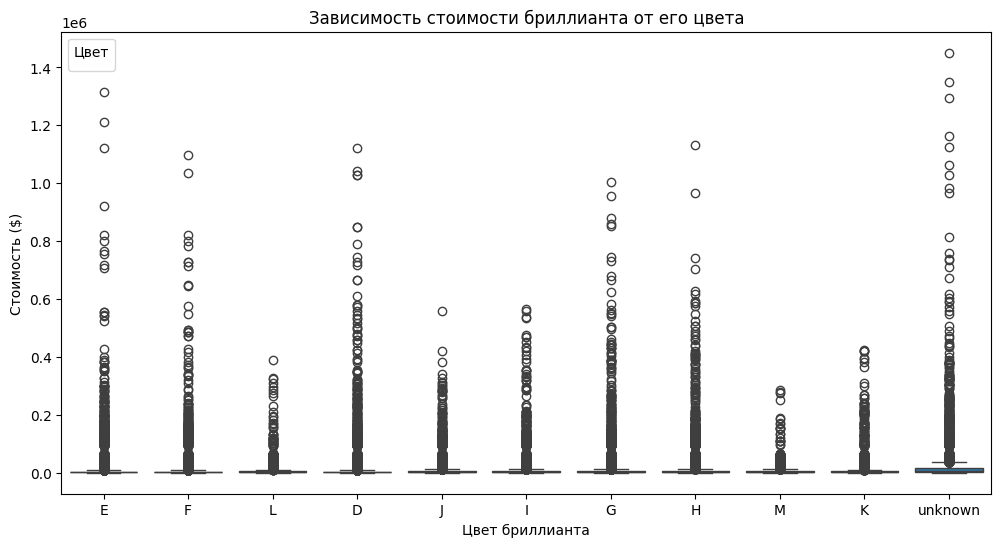

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


clean_data = diamonds.dropna(subset=['color', 'total_sales_price'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='color', y='total_sales_price', data=clean_data)
plt.title('Зависимость стоимости бриллианта от его цвета')
plt.xlabel('Цвет бриллианта')
plt.ylabel('Стоимость ($)')
plt.legend(title='Цвет')
plt.show()

Постройте график `лабараторная оценка - кол-во бриллиантов`:

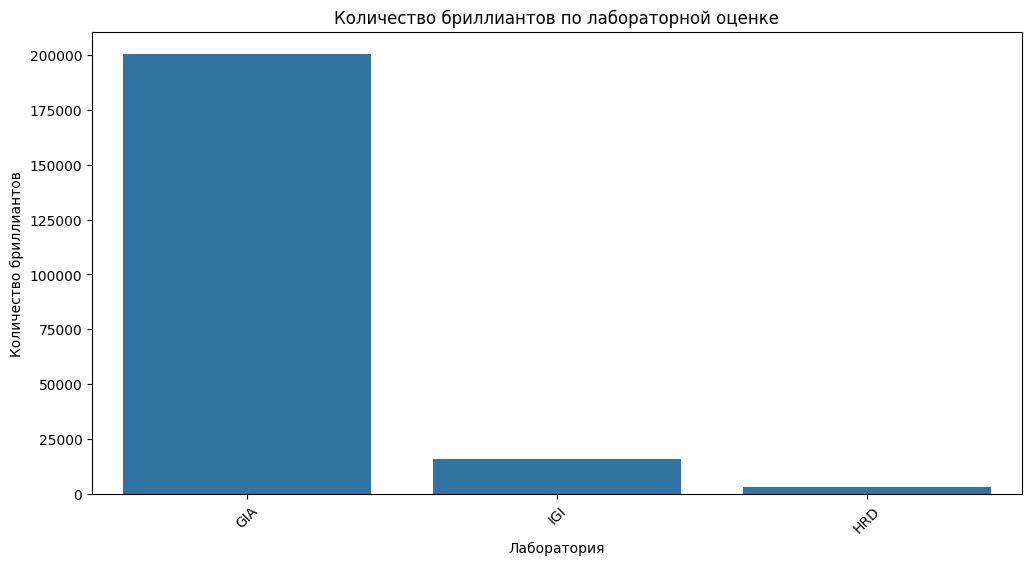

In [ ]:
clean_data = diamonds.dropna(subset=['lab'])

# Подсчет количества бриллиантов для каждой лаборатории
lab_counts = clean_data['lab'].value_counts()

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x=lab_counts.index, y=lab_counts.values)
plt.title('Количество бриллиантов по лабораторной оценке')
plt.xlabel('Лаборатория')
plt.ylabel('Количество бриллиантов')
plt.xticks(rotation=45)
plt.show()

Постройте график `вес бриллианта - стоимость`:

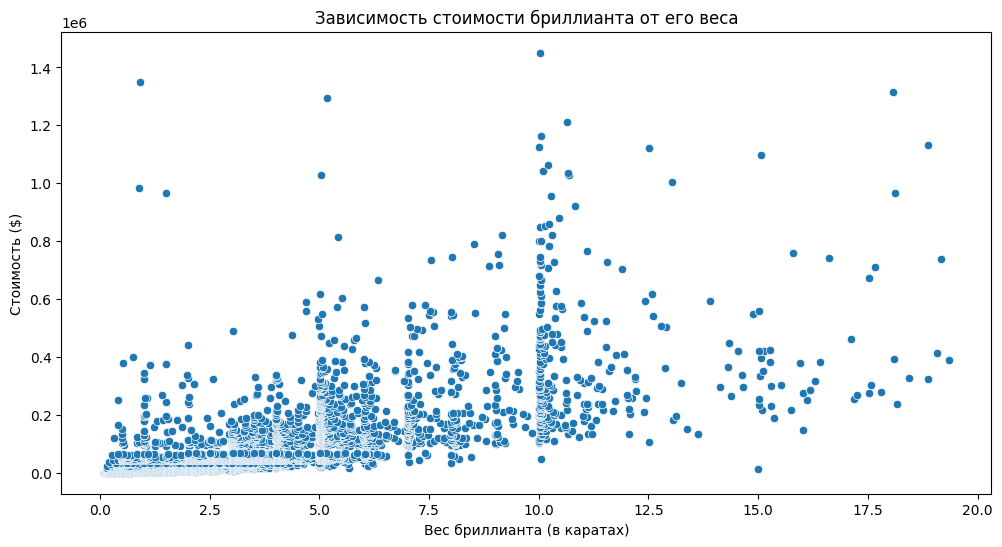

In [ ]:
clean_data = diamonds.dropna(subset=['carat_weight', 'total_sales_price'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x='carat_weight', y='total_sales_price', data=clean_data)
plt.title('Зависимость стоимости бриллианта от его веса')
plt.xlabel('Вес бриллианта (в каратах)')
plt.ylabel('Стоимость ($)')
plt.show()

Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

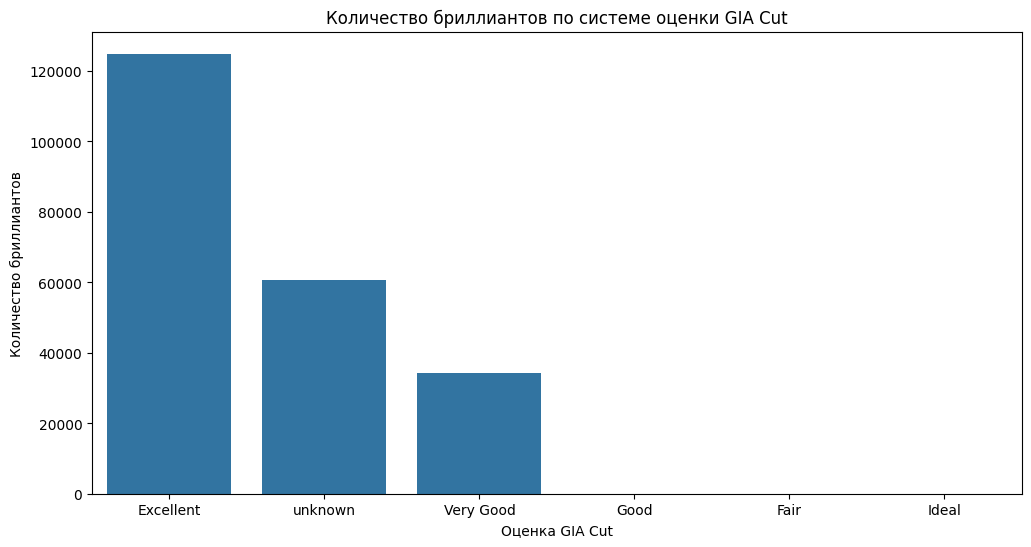

In [ ]:
cut_counts = diamonds['cut_quality'].value_counts()

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x=cut_counts.index, y=cut_counts.values)
plt.title('Количество бриллиантов по системе оценки GIA Cut')
plt.xlabel('Оценка GIA Cut')
plt.ylabel('Количество бриллиантов')
plt.show()